<a href="https://colab.research.google.com/github/sikaiser90/DS10/blob/main/Lab08_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree in Scikit Learn
![image.png](attachment:image.png)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

X = np.array([[0, 0], [1, 1]])
Y = np.array([0, 1])
clf = DecisionTreeClassifier()
clf = clf.fit(X, Y)

print(clf.predict([[-1., 0.]]))

[0]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print(y_pred, '\n', y_test)

[0 1 1 2 0 2 1 0 0 1 1 1 2 0 2 0 1 1 2 0 1 1 2 2 2 0 1 2 0 2 1 2 0 2 1 0 1
 2 1 0 0 0 0 2 1] 
 [0 1 1 2 0 2 1 0 0 1 1 1 2 0 2 0 1 1 2 0 2 1 2 2 2 0 1 2 0 2 1 2 0 2 1 0 1
 2 1 0 0 0 0 2 1]


In [ ]:
error = np.abs(y_pred-y_test)
np.nonzero(error)

(array([20], dtype=int64),)

In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_pred, y_test)
print(acc)

0.9777777777777777


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn import tree

X,y = load_iris().data, load_iris().target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=1/3)

#model base line
clf = DecisionTreeClassifier().fit(X_train, y_train)
acc = accuracy_score(clf.predict(X_test),y_test)
print(acc)

0.94


In [ ]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 5.05
|   |   |   |--- feature_0 <= 4.95
|   |   |   |   |--- feature_1 <= 2.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  2.45
|   |   |   |   |   |--- class: 2
|   |   |   |--- feature_0 >  4.95
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  5.05
|   |   |   |--- feature_0 <= 6.05
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  6.05
|   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



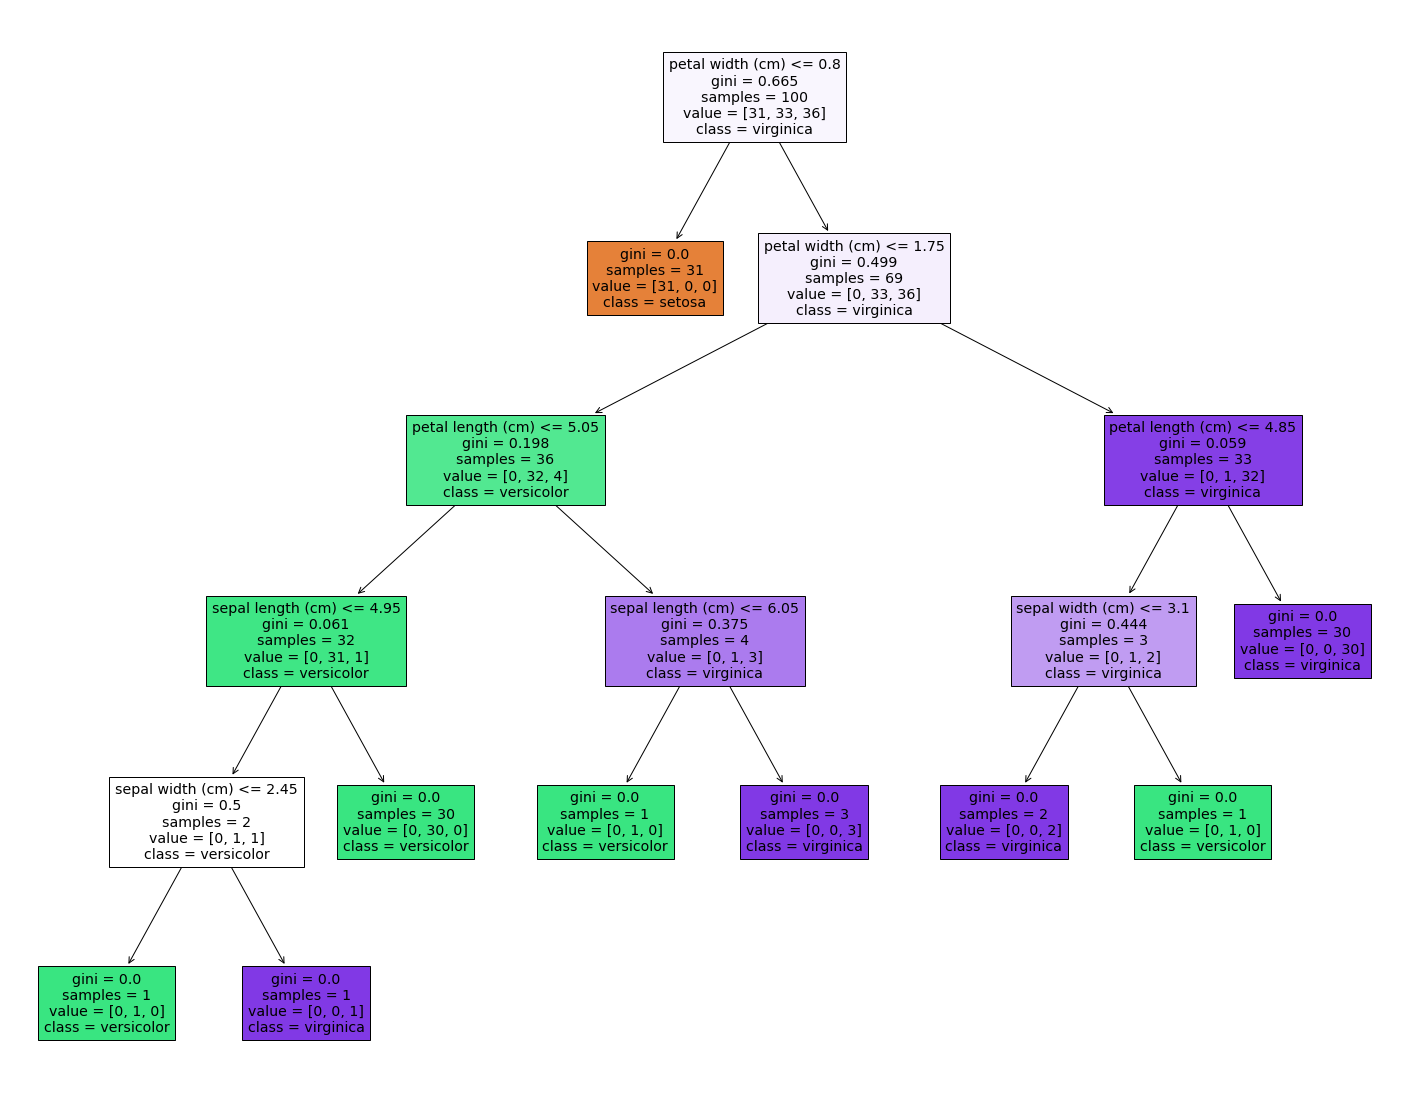

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

In [ ]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [ ]:
from dtreeviz.trees import dtreeviz


In [ ]:
viz = dtreeviz(clf, X, y,
                target_name="target",
                feature_names=iris.feature_names,
                class_names=list(iris.target_names))

In [ ]:
viz

ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

# IRIS Data example

### 1) Iris 데이터 load

### 2) Data split

### 3) DT 모델 만들기

### 4) 모델 학습

### 5) Test 데이터로 성능 검증


## Random Forest
![image.png](attachment:image.png)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)

clf = RandomForestClassifier(n_estimators=100, max_depth=2,
                              random_state=0)
clf.fit(X, y)

print(clf.feature_importances_)
print(clf.predict([[0, 0, 0, 0]]))

[0.14205973 0.76664038 0.0282433  0.06305659]
[1]


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

X,y = load_iris().data, load_iris().target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=1/3)

In [ ]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
print(accuracy_score(clf.predict(X_test),y_test))

0.9


# IRIS Data 앙상블 구조 voting classifier





In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

iris = datasets.load_iris()
X, y = iris.data, iris.target

clf1 = KNeighborsClassifier()
clf2 = DecisionTreeClassifier()
clf3 = RandomForestClassifier()


In [ ]:
eclf1 = VotingClassifier(estimators=[('knn', clf1), ('dt', clf2), ('rf', clf3)], voting='hard')
eclf1 = eclf1.fit(X, y)
print(eclf1.predict(X))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
eclf2 = VotingClassifier(estimators=[('knn', clf1), ('dt', clf2), ('rf', clf3)], voting='hard')
eclf2 = eclf2.fit(X, y)
print(eclf2.predict(X))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
eclf3 = VotingClassifier(estimators=[('knn', clf1), ('dt', clf2), ('rf', clf3)], voting='hard')
eclf3 = eclf3.fit(X, y)
print(eclf3.predict(X))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
print(accuracy_score(eclf1.predict(X),y))

1.0


In [ ]:
print(accuracy_score(eclf2.predict(X),y))

1.0


In [ ]:
print(accuracy_score(eclf3.predict(X),y))

1.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=1/3)